#### Trial code for plotting sample cross section data from iaea.org

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to the CSV file
file_path = 'data/X4sShowX4StdOut.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Filter out necessary columns
df_filtered = df[['author1', 'x2(eV)', 'y']].copy()
df_filtered.columns = ['Author', 'Energy', 'Cross_Section']

# Ensure that any rows with NaN values in the 'Energy' or 'Cross_Section' columns are removed
df_filtered = df_filtered.dropna(subset=['Energy', 'Cross_Section'])

# Convert Energy from eV to MeV
df_filtered['Energy'] = df_filtered['Energy'] * 1e-6

# Plotting - define the figure size
plt.figure(figsize=(12, 6))

# Define colors for each author
colors = ['fuchsia', 'dodgerblue','red']

# Plot data for each author
for (author, data), color in zip(df_filtered.groupby('Author'), colors):
    plt.plot(data['Energy'], data['Cross_Section'], linestyle='-', linewidth=1, label=author, color=color, alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Incident Energy (MeV)')
plt.ylabel('Cross-Section (barns)')
plt.title('U-233 Cross-Section Data (N, TOT)')
plt.xlim(1e-8, 1e-2)  # Adjust x-axis range from 10^-8 MeV to 10^-2 MeV
plt.ylim(10, 2e3)     # Adjust y-axis range from 10^1 to 2*10^3
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


#### Class definition for cross section data plotting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

class CrossSectionPlotter:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.df_filtered = None
    
    def load_data(self):
        # Load the CSV file
        self.df = pd.read_csv(self.file_path)
    
    def process_data(self):
        # Filter out necessary columns
        self.df_filtered = self.df[['author1', 'x2(eV)', 'y']].copy()
        self.df_filtered.columns = ['Author', 'Energy', 'Cross_Section']
        
        # Ensure that any rows with NaN values in the 'Energy' or 'Cross_Section' columns are removed
        self.df_filtered = self.df_filtered.dropna(subset=['Energy', 'Cross_Section'])
        
        # Convert Energy from eV to MeV
        self.df_filtered['Energy'] = self.df_filtered['Energy'] * 1e-6
    
    def plot_data(self, xlim, ylim, title='U-233 Cross-Section Data (N, TOT)'):
        # Plotting - define the figure size
        plt.figure(figsize=(12, 6))
        
        # Get unique authors
        authors = self.df_filtered['Author'].unique()
        
        # Generate a color map with a distinct color for each author
        colors = cm.rainbow(np.linspace(0, 1, len(authors)))
        
        # Plot data for each author
        for (author, data), color in zip(self.df_filtered.groupby('Author'), colors):
            plt.plot(data['Energy'], data['Cross_Section'], linestyle='-', linewidth=1, label=author, color=color, alpha=0.3)
        
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Incident Energy (MeV)')
        plt.ylabel('Cross-Section (barns)')
        plt.title(title)
        plt.xlim(xlim)  # Set x-axis range
        plt.ylim(ylim)  # Set y-axis range
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.show()

    def run(self, xlim=(1e-8, 1e-2), ylim=(10, 2e3), title='Title'):
        self.load_data()
        self.process_data()
        self.plot_data(xlim, ylim, title)

# Example usage:
# Create an instance of the CrossSectionPlotter class
plotter = CrossSectionPlotter(file_path='data/X4sShowX4StdOut.csv')

# Example, using default xlim, ylim, and custom title
plotter.run(title='U-233 Cross-Section Data (N, TOT)')

# Example, using custom xlim, ylim
plotter.run(xlim=(1e-7, 100), ylim=(1e-2, 1e6), title='U-233 Cross-Section Data (N, TOT), custom range test')

# Example, using larger data file with 7 authors and custom title
bigplotter = CrossSectionPlotter(file_path='data/X4sShowX4StdOut 2.csv')
bigplotter.run(xlim=(1e-8, 1), ylim=(1e0, 1e3), title='U-233 Cross-Section Data (N, F), large # authors test')


Columns in DataFrame:
Index(['#', 'DatasetID', 'year1', 'author1', 'DATA (B)  0.1 Y.Value',
       'ERR-S (B)  0.944 Y.sErr+-', 'ERR-1 (PER-CENT)  0.955 Y.pErr+-',
       'ERR-2 (PER-CENT)  0.955 Y.pErr+-', 'ERR-3 (PER-CENT)  0.955 Y.pErr+-',
       'ERR-SYS (PER-CENT)  0.955 Y.pErr+-', 'EN-MIN (EV)  1.2 X1.Min',
       'EN-MAX (EV)  1.3 X1.Max', 'MISC-ERR (PER-CENT)  777 ZZZ', 'zaTarg1',
       'Targ1', 'Proj', 'Emission', 'Prod', 'MF', 'MT', 'ReacType', 'Quant1',
       'nx', 'indVars', 'Reacode'],
      dtype='object')
Detected columns - Energy: EN-MIN (EV)  1.2 X1.Min, Cross_Section: DATA (B)  0.1 Y.Value, Author: author1
Columns in DataFrame:
Index(['#', 'DatasetID', 'year1', 'author1', 'DATA (B)  0.1 Y.Value',
       'ERR-S (PER-CENT)  0.944 Y.sErr+-', 'ERR-1 (PER-CENT)  0.955 Y.pErr+-',
       'ERR-2 (PER-CENT)  0.955 Y.pErr+-', 'ERR-3 (PER-CENT)  0.955 Y.pErr+-',
       'ERR-4 (PER-CENT)  0.955 Y.pErr+-',
       'ERR-SYS (PER-CENT)  0.955 Y.pErr+-', 'EN-MIN (EV)  1.2 X1.Min',
 

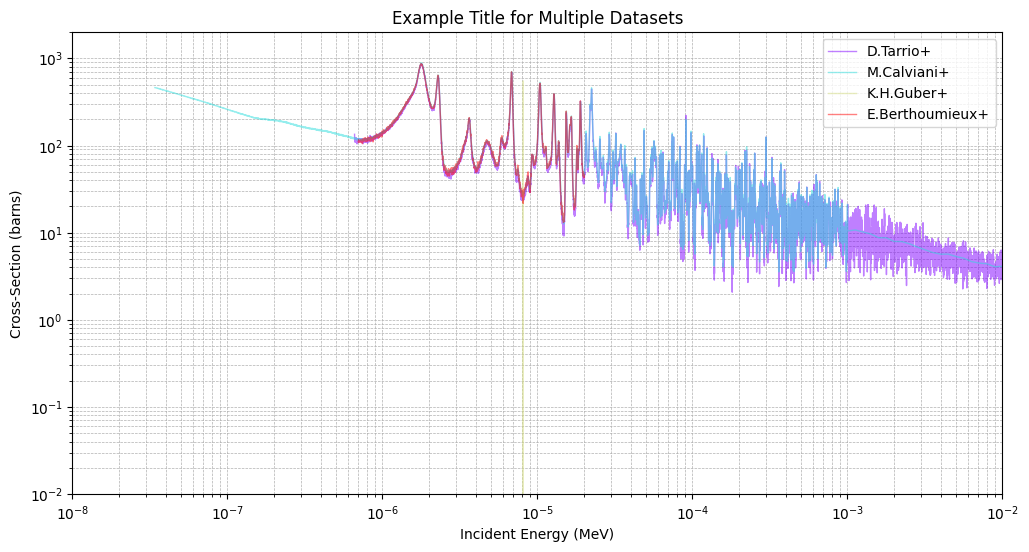

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import requests
from io import StringIO

class CrossSectionPlotter:
    def __init__(self, urls=None):
        self.urls = urls
        self.dataframes = []

    def load_data(self):
        for url in self.urls:
            # Fetch the data from URL
            response = requests.get(url)
            html_data = response.text
            self.parse_html_data(html_data)

    def parse_html_data(self, html_data):
        # Wrap the HTML content in a StringIO object
        tables = pd.read_html(StringIO(html_data))
        
        # Assuming the first table is the one we need
        df = tables[0]
        
        # Append to the list of DataFrames
        self.dataframes.append(df)
    
    def process_data(self):
        processed_data = []
        for df in self.dataframes:
            # Print column names for debugging
            print("Columns in DataFrame:")
            print(df.columns)
            
            # Try to find the correct columns based on common naming patterns
            energy_col = None
            cross_section_col = None
            author_col = None
            
            for col in df.columns:
                if 'EN' in col.upper() and 'MIN' in col.upper():
                    energy_col = col
                if 'DATA' in col.upper() or 'CROSS' in col.upper():
                    cross_section_col = col
                if 'AUTHOR' in col.upper():
                    author_col = col
            
            # Print detected column names for debugging
            print(f"Detected columns - Energy: {energy_col}, Cross_Section: {cross_section_col}, Author: {author_col}")
            
            if energy_col is None or cross_section_col is None or author_col is None:
                raise ValueError("Could not find the required columns in the DataFrame.")
            
            # Convert columns to numeric and drop NaNs
            df[energy_col] = pd.to_numeric(df[energy_col], errors='coerce')
            df[cross_section_col] = pd.to_numeric(df[cross_section_col], errors='coerce')
            
            # Filter out necessary columns
            df_filtered = df[[energy_col, cross_section_col, author_col]].copy()
            df_filtered.columns = ['Energy', 'Cross_Section', 'Author']
            
            # Ensure that any rows with NaN values in the 'Energy' or 'Cross_Section' columns are removed
            df_filtered = df_filtered.dropna(subset=['Energy', 'Cross_Section'])
            
            # Convert Energy from eV to MeV
            df_filtered['Energy'] = df_filtered['Energy'] * 1e-6
            
            processed_data.append(df_filtered)
        
        self.df_filtered = processed_data
    
    def plot_data(self, xlim=(1e-8, 1e-2), ylim=(1e-2, 2e3), title='Cross-Section Data'):
        # Plotting - define the figure size
        plt.figure(figsize=(12, 6))
        
        # Generate a color map with a distinct color for each dataset
        colors = cm.rainbow(np.linspace(0, 1, len(self.df_filtered)))
        
        # Plot each dataset
        for df, color in zip(self.df_filtered, colors):
            author = df['Author'].iloc[0]
            plt.plot(df['Energy'], df['Cross_Section'], linestyle='-', linewidth=1, label=author, color=color, alpha=0.5)
        
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Incident Energy (MeV)')
        plt.ylabel('Cross-Section (barns)')
        plt.title(title)
        plt.xlim(xlim)  # Set x-axis range
        plt.ylim(ylim)  # Set y-axis range
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.show()

    def run(self, xlim=(1e-8, 1e-2), ylim=(1e-2, 2e3), title='Cross-Section Data'):
        self.load_data()
        self.process_data()
        self.plot_data(xlim, ylim, title)

# Example usage:
urls = [
    'https://www-nds.iaea.org/exfor/servlet/X4sGetAjaxDataset?DatasetID=23654004&op=x4csv&mode=2&compact=1&plus=1',
    'https://www-nds.iaea.org/exfor/servlet/X4sGetAjaxDataset?DatasetID=23072009&op=x4csv&mode=2&compact=1&plus=1',
    'https://www-nds.iaea.org/exfor/servlet/X4sGetAjaxDataset?DatasetID=13890002&op=x4csv&mode=2&compact=1&plus=1',
    'https://www-nds.iaea.org/exfor/servlet/X4sGetAjaxDataset?DatasetID=23071002&op=x4csv&mode=2&compact=1&plus=1'
    # Add more URLs as needed
]

plotter = CrossSectionPlotter(urls=urls)
plotter.run(title='Example Title for Multiple Datasets')
